# Challenging the accuracy of Bivariate Poisson Distribution for Football Predictions

# Purpose of the analysis

# Poisson Distribution 

# Bivariate Poisson for Football

# Introduction to the dataset

In [2]:
%%capture
from scipy.stats import poisson
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
pd.options.display.max_rows = 1999
pd.options.display.max_columns = 1999

import glob

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 100)
my_list = []
for file in glob.glob("C:/Users/someuser/Downloads/data/*" + ".csv"):
    try:
#         print(file)
        x = pd.read_csv(file, encoding = 'latin1')
        my_list.append(x)
        #print(x.columns)
        #     print(file, len(x.columns))
    except:
        continue
final = pd.concat(my_list)
final_test =pd.concat(my_list)

print(final_test.info())



sample = final_test
sample = sample.rename(columns = {'Ora' : 'time', 'League' : 'league', 'Date' : 'date', 'FTGH' :'homegoals',
                       'FTGA' : 'awaygoals'})
sample.head()


sample['rov2,5'] = round(sample['oddover'],1)

sample['gagnota'] = 1 / sample['oddassavg'] +  1/ sample['oddxavg']  +  1 / sample['odddiploavg']


sample['assnogagnota'] = sample['oddassavg'] * sample['gagnota']
sample['xnogagnota'] = sample['oddxavg'] * sample['gagnota']
sample['diplonogagnota'] = sample['odddiploavg'] * sample['gagnota']


sample['homegind'] = sample['sphgfavg'] * sample['spawgagavg']

sample['awgind'] = sample['sphgagavg'] * sample['spawgfavg']
sample['date2'] = pd.to_datetime(sample['date'],dayfirst = True, errors = 'coerce')
sample['year'] = sample['date2'].dt.year
sample['month'] = sample['date2'].dt.month
sample.head(10)




for col in ['homegoals', 'awaygoals','oddassavg', 'oddxavg', 'odddiploavg', 'oddunder', 'oddover'] : 
    sample[col] = pd.to_numeric(sample[col], errors = 'coerce')


sample['homeunder1,5'] =  sample['homegoals'].apply(lambda x : 1 if x <2 else 0)  
sample['awayunder1,5'] =  sample['awaygoals'].apply(lambda x : 1 if x <2 else 0) 

    
sample['x'] = np.where(sample['homegoals'] == sample['awaygoals'],1,0)
sample['u15'] = np.where((sample['homegoals'] + sample['awaygoals'])<2,1,0)
sample['ov25'] = np.where((sample['homegoals'] + sample['awaygoals'])>2,1,0)

under15dict = {
1.5 : 5,
1.6 : 4.60,
1.7  : 4.05,
1.8  : 3.8,
1.9 :  3.5,
2  :  3.3,  
2.1  : 3.1,
2.2 : 2.9,
2.3  :  2.8,
2.4 : 2.65,
2.5 : 2.5,
2.6 : 2.42,
2.7 : 2.35,
2.8 : 2.25,
2.9 : 2.17,
3 :  2.1 }



over35dict = {
1.5 :  2.3,
1.6  :   2.45,
1.7  :   2.7,
1.8 : 3,
1.9 :  3.2,
2  :  3.45 ,
2.1 : 3.75 ,
2.2 : 4 ,
2.3  :  4.25,
2.4 : 4.55,
2.5 : 4.85,
2.6 : 5.15,
2.7 : 5.4,
2.8 : 5.85,
2.9 : 6,
3   :  6.2  }

sample['oddunder1,5'] = sample['rov2,5'].map(under15dict)
sample['oddover3,5'] = sample['rov2,5'].map(over35dict)   

sample['oddover3,5gg'] = 1.1*sample['oddover3,5']



sample['Country'] = sample['Country'].astype(str)
sample['league'] = sample['league'].astype(str)


sample['league'] = sample['league'].apply(lambda s : s.replace("." , ""))
sample['league'] = sample['league'].apply(lambda s : s.replace("," , ""))


import re

def xaxa2(s):
    try:
      # splitting the s string, on the occurence of the regex, which is four digits, and returning the first element of the list created from the split
        a  =  re.compile(r'\d{4}').split(s)[0]
        return a
    except TypeError:
        return 'not_splitted'

# Applying it on  a column
sample['league2'] = sample['league'].apply(lambda x : xaxa2(x))

# Creating empty strings, back and forth
sample['Country2'] = sample['Country'].apply(lambda x : ' ' + str(x) + ' ')

# Concatenating the two columns
sample['Country - League'] = sample.Country2.str.cat(sample.league2)



df = sample
df['homeover05'] =  df['homegoals'].apply(lambda x : 1 if x > 0 else 0)
df['homeover15'] =  df['homegoals'].apply(lambda x : 1 if x > 1 else 0)
df['homeover25'] =  df['homegoals'].apply(lambda x : 1 if x > 2 else 0)
df['homeover35'] =  df['homegoals'].apply(lambda x : 1 if x > 3 else 0)
df['awayover05'] =  df['awaygoals'].apply(lambda x : 1 if x > 0 else 0)
df['awayover15'] =  df['awaygoals'].apply(lambda x : 1 if x > 1 else 0)
df['awayover25'] =  df['awaygoals'].apply(lambda x : 1 if x > 2 else 0)
df['awayover35'] =  df['awaygoals'].apply(lambda x : 1 if x > 3 else 0)

df['oddassavgr'] = round(df['oddassavg'],1)

# Letting 5 special matches to have passed
df = df[df['Games_HaH'] >= 5]


df['homegind'] = df['sphgfavg'] *  df['spawgagavg']
df['awaygind'] = df['spawgfavg'] *  df['sphgagavg']


df['homeodddev'] =  (1 / df['H_Win_odd_avg']) - (1 / df['oddassavg'])
df['awayodddev'] = (1 / df['A_Win_odd_avg'])  - ( 1 / df['odddiploavg'])

df['date2'] = pd.to_datetime(df['date'], errors = 'coerce', dayfirst=True)

df['month'] = df['date2'].dt.month
df['year'] = df['date2'].dt.year

df.info()



# Number of games per year

In [3]:
df.groupby(['year'])['homegoals'].size()

year
2015    17270
2016     4149
2017    20943
2018    35746
2019    20643
2020    18979
2021     2109
Name: homegoals, dtype: int64

# Distribution of Home Goals

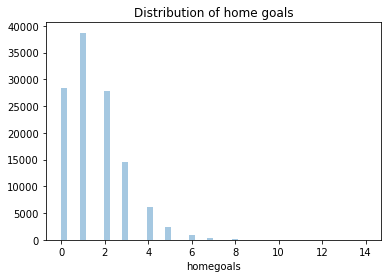

In [4]:
sns.distplot(df['homegoals'],kde=False)
plt.title('Distribution of home goals')
plt.show()

# Away Goals Distribution

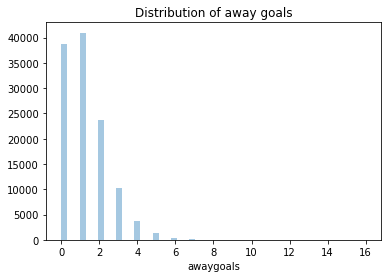

In [5]:
sns.distplot(df['awaygoals'],kde=False)
plt.title('Distribution of away goals')
plt.show()

# Thorough explanation of the calculation of the transformed mean(goal expectancy) for each opponent

In [6]:
def poisson2(x):
    """Function to calculate poisson distribution probabilities, x = the transformed mean  """
    rv = poisson(x)
    for i in range(0,10):
        print('Prob of home team scoring ' + str(i) + ' goals is:',round(rv.pmf(i),2))
poisson2(2.07)

Prob of home team scoring 0 goals is: 0.13
Prob of home team scoring 1 goals is: 0.26
Prob of home team scoring 2 goals is: 0.27
Prob of home team scoring 3 goals is: 0.19
Prob of home team scoring 4 goals is: 0.1
Prob of home team scoring 5 goals is: 0.04
Prob of home team scoring 6 goals is: 0.01
Prob of home team scoring 7 goals is: 0.0
Prob of home team scoring 8 goals is: 0.0
Prob of home team scoring 9 goals is: 0.0


In [7]:
from scipy.stats import poisson
def poisson2(x):
    """Function to calculate poisson distribution probabilities, x = the mean  """
    rv = poisson(x)
    for i in range(0,10):
        print('Prob of away team scoring ' + str(i) + ' goals is:',round(rv.pmf(i),2))
poisson2(0.51)

Prob of away team scoring 0 goals is: 0.6
Prob of away team scoring 1 goals is: 0.31
Prob of away team scoring 2 goals is: 0.08
Prob of away team scoring 3 goals is: 0.01
Prob of away team scoring 4 goals is: 0.0
Prob of away team scoring 5 goals is: 0.0
Prob of away team scoring 6 goals is: 0.0
Prob of away team scoring 7 goals is: 0.0
Prob of away team scoring 8 goals is: 0.0
Prob of away team scoring 9 goals is: 0.0


# Explanation of the analysis

# Creation of the home and away teams transformed means

In [8]:
%%capture
df['poissonhomeavg'] = df['sphgfavg'] * df['spawgagavg'] / df['L_GH_avg']
df['poissonawayavg'] = df['spawgfavg'] * df['sphgagavg'] / df['L_GA_avg']


# Poisson Distribution for home team exactly 0 goals

In [9]:
%%capture
from scipy.stats import poisson

def poisson2(x):
    """Function to calculate poisson probabilities, x = the avg  """
    rv = poisson(x)
# Return the probability of 1 goals
    return rv.pmf(0)

# Creation of zer goal of home team column
df['home_zero_goal'] = np.where(df['homegoals'] == 0,1,0)

# Creation of poisson probability of exactly 0 goal for hometeam
df['home_0_goals_poisson_prob'] = df['poissonhomeavg'].apply(lambda x: poisson2(x))

# Rounding the above column
df['home_0_goals_poisson_prob'] = round(df['home_0_goals_poisson_prob'],2)
df['home_0_goals_poisson_probR'] = round(df['home_0_goals_poisson_prob'],1)



# Poisson Distribution for home team exactly 1 goal

In [10]:
%%capture
from scipy.stats import poisson

def poisson2(x):
    """Function to calculate poisson probabilities, x = the avg  """
    rv = poisson(x)
# Return the probability of 1 goals
    return rv.pmf(1)

# Creation of one goal of home team column
df['home_one_goal'] = np.where(df['homegoals'] == 1,1,0)

# Creation of poisson probability of exactly 1 goal for hometeam
df['home_1_goals_poisson_prob'] = df['poissonhomeavg'].apply(lambda x: poisson2(x))

# Rounding the above column
df['home_1_goals_poisson_prob'] = round(df['home_1_goals_poisson_prob'],2)
df['home_1_goals_poisson_probR'] = round(df['home_1_goals_poisson_prob'],1)

# Poisson Distribution for home team exactly 2 goals

In [11]:
%%capture
from scipy.stats import poisson

def poisson2(x):
    """Function to calculate poisson probabilities, x = the avg  """
    rv = poisson(x)
# Return the probability of 2 goals
    return rv.pmf(2)

# Creation of 2 goals of home team column
df['home_two_goals'] = np.where(df['homegoals'] == 2,1,0)

# Creation of poisson probability of exactly 1 goal for hometeam
df['home_2_goals_poisson_prob'] = df['poissonhomeavg'].apply(lambda x: poisson2(x))

# Rounding the above column
df['home_2_goals_poisson_prob'] = round(df['home_2_goals_poisson_prob'],2)
df['home_2_goals_poisson_probR'] = round(df['home_2_goals_poisson_prob'],1)

# Poisson Distribution for home team exactly 3 goals

In [12]:
%%capture
from scipy.stats import poisson

def poisson2(x):
    """Function to calculate poisson probabilities, x = the avg  """
    rv = poisson(x)
# Return the probability of 3 goals
    return rv.pmf(3)

# Creation of 3 goals of home team column
df['home_three_goals'] = np.where(df['homegoals'] == 3,1,0)

# Creation of poisson probability of exactly 1 goal for hometeam
df['home_3_goals_poisson_prob'] = df['poissonhomeavg'].apply(lambda x: poisson2(x))

# Rounding the above column
df['home_3_goals_poisson_prob'] = round(df['home_3_goals_poisson_prob'],2)
df['home_3_goals_poisson_probR'] = round(df['home_3_goals_poisson_prob'],1)

# Poisson Distribution for home team exactly 4 goals

In [13]:
%%capture
from scipy.stats import poisson

def poisson2(x):
    """Function to calculate poisson probabilities, x = the avg  """
    rv = poisson(x)
# Return the probability of 4 goals
    return rv.pmf(4)

# Creation of 4 goals of home team column
df['home_four_goals'] = np.where(df['homegoals'] == 4,1,0)

# Creation of poisson probability of exactly 1 goal for hometeam
df['home_4_goals_poisson_prob'] = df['poissonhomeavg'].apply(lambda x: poisson2(x))

# Rounding the above column
df['home_4_goals_poisson_prob'] = round(df['home_4_goals_poisson_prob'],2)
df['home_4_goals_poisson_probR'] = round(df['home_4_goals_poisson_prob'],1)

# Poisson Distribution for away team exactly 0 goals

In [14]:
%%capture
from scipy.stats import poisson

def poisson2(x):
    """Function to calculate poisson probabilities, x = the avg , """
    rv = poisson(x)
# Return the probability of 0 goals
    return rv.pmf(0)

# Creation of 0 goal of away team column
df['away_zero_goals'] = np.where(df['awaygoals'] == 0,1,0)

# Creation of poisson probability of exactly 1 goal for hometeam
df['away_0_goals_poisson_prob'] = df['poissonawayavg'].apply(lambda x: poisson2(x))

# Rounding the above column
df['away_0_goals_poisson_prob'] = round(df['away_0_goals_poisson_prob'],2)
df['away_0_goals_poisson_probR'] = round(df['away_0_goals_poisson_prob'],1)

# Poisson Distribution for away team exactly 1 goals

In [15]:
%%capture
from scipy.stats import poisson

def poisson2(x):
    """Function to calculate poisson probabilities, x = the avg , """
    rv = poisson(x)
# Return the probability of 1 goals
    return rv.pmf(1)

# Creation of 1 goals of away team column
df['away_one_goals'] = np.where(df['awaygoals'] == 1,1,0)

# Creation of poisson probability of exactly 1 goal for hometeam
df['away_1_goals_poisson_prob'] = df['poissonawayavg'].apply(lambda x: poisson2(x))

# Rounding the above column
df['away_1_goals_poisson_prob'] = round(df['away_1_goals_poisson_prob'],2)
df['away_1_goals_poisson_probR'] = round(df['away_1_goals_poisson_prob'],1)

# Poisson Distribution for away team exactly 2 goals

In [16]:
%%capture
from scipy.stats import poisson

def poisson2(x):
    """Function to calculate poisson probabilities, x = the avg , """
    rv = poisson(x)
# Return the probability of 2 goals
    return rv.pmf(2)

# Creation of 2 goals of away team column
df['away_two_goals'] = np.where(df['awaygoals'] == 2,1,0)

# Creation of poisson probability of exactly 1 goal for hometeam
df['away_2_goals_poisson_prob'] = df['poissonawayavg'].apply(lambda x: poisson2(x))

# Rounding the above column
df['away_2_goals_poisson_prob'] = round(df['away_2_goals_poisson_prob'],2)
df['away_2_goals_poisson_probR'] = round(df['away_2_goals_poisson_prob'],1)

# Poisson Distribution for away team exactly 3 goals

In [17]:
%%capture
from scipy.stats import poisson

def poisson2(x):
    """Function to calculate poisson, x = the avg , """
    rv = poisson(x)
# Return the probability of 3 goals
    return rv.pmf(3)

# Creation of 3 goals of away team column
df['away_three_goals'] = np.where(df['awaygoals'] == 3,1,0)

# Creation of poisson probability of exactly 1 goal for hometeam
df['away_3_goals_poisson_prob'] = df['poissonawayavg'].apply(lambda x: poisson2(x))

# Rounding the above column
df['away_3_goals_poisson_prob'] = round(df['away_3_goals_poisson_prob'],2)
df['away_3_goals_poisson_probR'] = round(df['away_3_goals_poisson_prob'],1)

# Poisson Distribution for away team exactly 4 goals

In [18]:
%%capture
from scipy.stats import poisson

def poisson2(x):
    """Function to calculate poisson, x = the avg , """
    rv = poisson(x)
# Return the probability of 4 goals
    return rv.pmf(4)

# Creation of 4 goals of away team column
df['away_four_goals'] = np.where(df['awaygoals'] == 4,1,0)

# Creation of poisson probability of exactly 1 goal for hometeam
df['away_4_goals_poisson_prob'] = df['poissonawayavg'].apply(lambda x: poisson2(x))

# Rounding the above column
df['away_4_goals_poisson_prob'] = round(df['away_4_goals_poisson_prob'],2)
df['away_4_goals_poisson_probR'] = round(df['away_4_goals_poisson_prob'],1)

# AGGREGATIONS - GRAPHS

# Aggregating by home_0_goals_poisson_prob

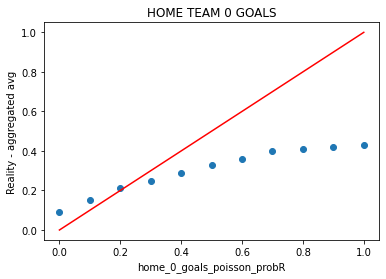

,home_0_goals_poisson_probR,size,home_zero_goal_mean
0,0.0,6773,0.09
1,0.1,21837,0.15
2,0.2,30924,0.21
3,0.3,21670,0.25
4,0.4,18721,0.29
5,0.5,9294,0.33
6,0.6,6222,0.36
7,0.7,2554,0.40
8,0.8,1228,0.41
9,0.9,280,0.42


In [19]:
groupbycol = 'home_0_goals_poisson_probR'
a = df.groupby([groupbycol]).agg({'home_zero_goal' : [np.size,np.mean],  
                                            }).reset_index()
a.columns = a.columns.droplevel()
a.columns = [groupbycol] + [ 'size','home_zero_goal_mean',  ]

b = a[a['size'] > 50]
b['home_zero_goal_mean'] = round(b['home_zero_goal_mean'],2)


plt.scatter(x = b[groupbycol], y = b['home_zero_goal_mean'])

plt.title('HOME TEAM 0 GOALS')
plt.xlabel(groupbycol)
plt.ylabel('Reality - aggregated avg')
plt.plot([0,1],[0,1], 'r')
plt.show()
plt.show()

b

# Aggregation with rounding at the 2nd decimal

In [20]:
%%capture
groupbycol = 'home_0_goals_poisson_prob'
a = df.groupby([groupbycol]).agg({'home_zero_goal' : [np.size,np.mean],  
                                            }).reset_index()
a.columns = a.columns.droplevel()
a.columns = [groupbycol] + [ 'size','home_zero_goal_mean',  ]

b = a[a['size'] > 50]
b['home_zero_goal_mean'] = round(b['home_zero_goal_mean'],2)


plt.scatter(x = b[groupbycol], y = b['home_zero_goal_mean'])

plt.title('HOME TEAM 0 GOALS')
plt.xlabel(groupbycol)
plt.ylabel('Reality - aggregated avg')

plt.plot([0,1],[0,1], 'r')
plt.show()
plt.show()

b

# Distribution of Home 0 goals probabilities

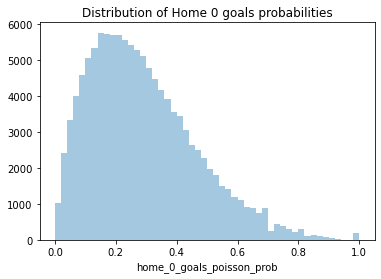

In [21]:
sns.distplot(df['home_0_goals_poisson_prob'],kde=False,bins=50)
plt.title('Distribution of Home 0 goals probabilities')
plt.show()

# Aggregating by home_1_goals_poisson_prob

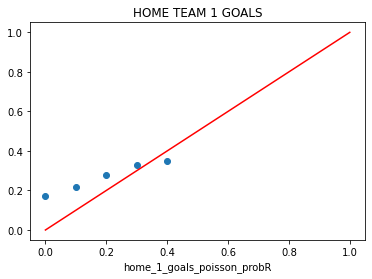

,home_1_goals_poisson_probR,size,home_one_goal_mean
0,0.0,989,0.17
1,0.1,5014,0.22
2,0.2,18813,0.28
3,0.3,46305,0.33
4,0.4,48576,0.35


In [25]:
groupbycol = 'home_1_goals_poisson_probR'
a = df.groupby([groupbycol]).agg({'home_one_goal' : [np.size,np.mean],  
                                            }).reset_index()
a.columns = a.columns.droplevel()
a.columns = [groupbycol] + [ 'size','home_one_goal_mean',  ]

b = a[a['size'] > 50]
b['home_one_goal_mean'] = round(b['home_one_goal_mean'],2)


plt.scatter(x = b[groupbycol], y = b['home_one_goal_mean'])

plt.title('HOME TEAM 1 GOALS')
plt.xlabel(groupbycol)

plt.plot([0,1],[0,1], 'r')
plt.show()
plt.show()

b

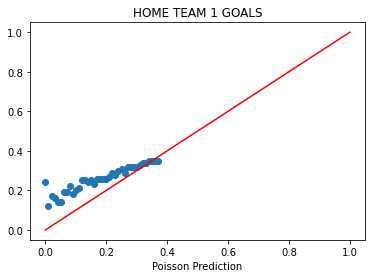

,home_1_goals_poisson_prob,size,home_one_goal_mean
0,0.00,209,0.24
1,0.01,80,0.12
2,0.02,109,0.17
3,0.03,143,0.16
4,0.04,211,0.14
5,0.05,237,0.14
6,0.06,295,0.19
7,0.07,316,0.19
8,0.08,421,0.22
9,0.09,440,0.18


In [26]:
groupbycol = 'home_1_goals_poisson_prob'
a = df.groupby([groupbycol]).agg({'home_one_goal' : [np.size,np.mean],  
                                            }).reset_index()
a.columns = a.columns.droplevel()
a.columns = [groupbycol] + [ 'size','home_one_goal_mean',  ]

b = a[a['size'] > 50]
b['home_one_goal_mean'] = round(b['home_one_goal_mean'],2)


plt.scatter(x = b[groupbycol], y = b['home_one_goal_mean'])

plt.title('HOME TEAM 1 GOALS')
plt.xlabel('Poisson Prediction')

plt.plot([0,1],[0,1], 'r')
plt.show()
plt.show()

b

# Distribution of Home 1 goal probabilities

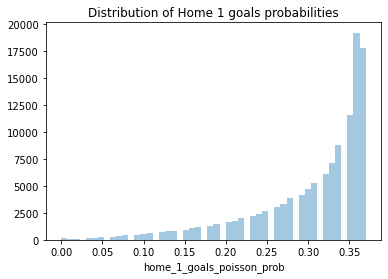

In [27]:
sns.distplot(df[groupbycol],kde=False,bins=50)
plt.title('Distribution of Home 1 goals probabilities')
plt.show()

#   HOME team exactly 2 GOALS

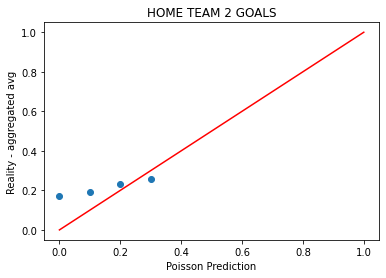

,home_2_goals_poisson_probR,size,home_two_goals_mean
0,0.0,3986,0.17
1,0.1,18083,0.19
2,0.2,61726,0.23
3,0.3,35902,0.26


In [28]:


groupbycol = 'home_2_goals_poisson_probR'
a = df.groupby([groupbycol]).agg({'home_two_goals' : [np.size,np.mean],  
                                            }).reset_index()
a.columns = a.columns.droplevel()
a.columns = [groupbycol] + [ 'size','home_two_goals_mean',  ]

b = a[a['size'] > 50]
b['home_two_goals_mean'] = round(b['home_two_goals_mean'],2)


plt.scatter(x = b[groupbycol], y = b['home_two_goals_mean'])

plt.title('HOME TEAM 2 GOALS')
plt.xlabel('Poisson Prediction')
plt.ylabel('Reality - aggregated avg')
plt.plot([0,1],[0,1], 'r')
plt.show()
plt.show()

b

# Rounded at 2nd decimal

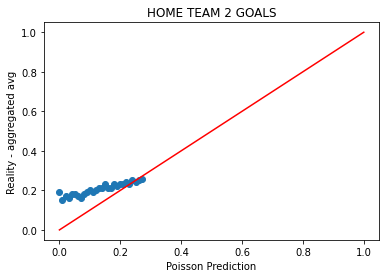

,home_2_goals_poisson_prob,size,home_two_goals_mean
0,0.00,266,0.19
1,0.01,437,0.15
2,0.02,564,0.17
3,0.03,731,0.16
4,0.04,917,0.18
5,0.05,1071,0.18
6,0.06,1298,0.17
7,0.07,1360,0.16
8,0.08,1577,0.18
9,0.09,1758,0.19


In [29]:


groupbycol = 'home_2_goals_poisson_prob'
a = df.groupby([groupbycol]).agg({'home_two_goals' : [np.size,np.mean],  
                                            }).reset_index()
a.columns = a.columns.droplevel()
a.columns = [groupbycol] + [ 'size','home_two_goals_mean',  ]

b = a[a['size'] > 50]
b['home_two_goals_mean'] = round(b['home_two_goals_mean'],2)


plt.scatter(x = b[groupbycol], y = b['home_two_goals_mean'])

plt.title('HOME TEAM 2 GOALS')
plt.xlabel('Poisson Prediction')
plt.ylabel('Reality - aggregated avg')
plt.plot([0,1],[0,1], 'r')
plt.show()
plt.show()

b

# Distribution of Home 2 goal probabilities

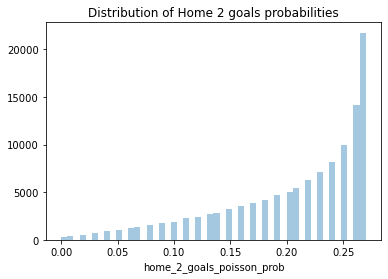

In [30]:
sns.distplot(df[groupbycol],kde=False,bins=50)
plt.title('Distribution of Home 2 goals probabilities')
plt.show()

# HOME team exactly 3 GOALS

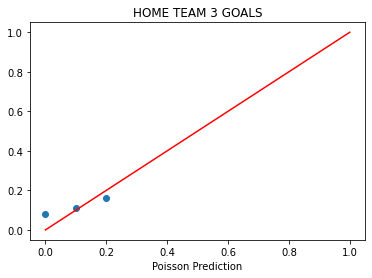

,home_3_goals_poisson_probR,size,home_three_goals_mean
0,0.0,30201,0.08
1,0.1,48406,0.11
2,0.2,41090,0.16


In [31]:

groupbycol = 'home_3_goals_poisson_probR'
a = df.groupby([groupbycol]).agg({'home_three_goals' : [np.size,np.mean],  
                                            }).reset_index()
a.columns = a.columns.droplevel()
a.columns = [groupbycol] + [ 'size','home_three_goals_mean',  ]

b = a[a['size'] > 50]
b['home_three_goals_mean'] = round(b['home_three_goals_mean'],2)


plt.scatter(x = b[groupbycol], y = b['home_three_goals_mean'])

plt.title('HOME TEAM 3 GOALS')
plt.xlabel('Poisson Prediction')

plt.plot([0,1],[0,1], 'r')
plt.show()
plt.show()

b

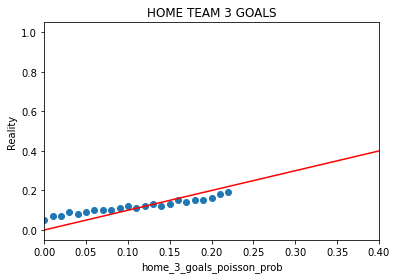

,home_3_goals_poisson_prob,size,home_three_goals_mean
0,0.00,2614,0.05
1,0.01,5120,0.07
2,0.02,5303,0.07
3,0.03,5575,0.09
4,0.04,5676,0.08
5,0.05,5913,0.09
6,0.06,5835,0.10
7,0.07,5713,0.10
8,0.08,5532,0.10
9,0.09,5752,0.11


In [32]:
groupbycol = 'home_3_goals_poisson_prob'
a = df.groupby([groupbycol]).agg({'home_three_goals' : [np.size,np.mean],  
                                            }).reset_index()
a.columns = a.columns.droplevel()
a.columns = [groupbycol] + [ 'size','home_three_goals_mean',  ]

b = a[a['size'] > 50]
b['home_three_goals_mean'] = round(b['home_three_goals_mean'],2)


plt.scatter(x = b[groupbycol], y = b['home_three_goals_mean'])

plt.title('HOME TEAM 3 GOALS')
plt.xlabel(groupbycol)
plt.ylabel('Reality')
plt.xlim(0,0.4)
plt.plot([0,1],[0,1], 'r')
plt.show()
plt.show()

b

# Distribution of Home 3 goals probabilities

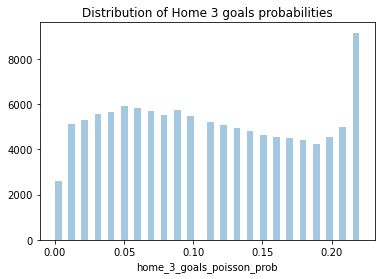

In [33]:
sns.distplot(df[groupbycol],kde=False)
plt.title('Distribution of Home 3 goals probabilities')
plt.show()

# HOME team exactly 4 GOALS

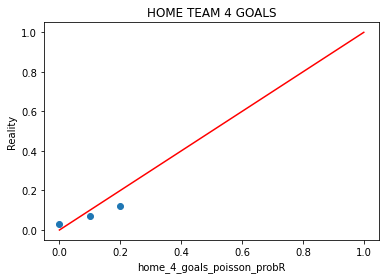

,home_4_goals_poisson_probR,size,home_four_goals_mean
0,0.0,74733,0.03
1,0.1,35259,0.07
2,0.2,9705,0.12


In [34]:
groupbycol = 'home_4_goals_poisson_probR'
a = df.groupby([groupbycol]).agg({'home_four_goals' : [np.size,np.mean],  
                                            }).reset_index()
a.columns = a.columns.droplevel()
a.columns = [groupbycol] + [ 'size','home_four_goals_mean',  ]

b = a[a['size'] > 50]
b['home_four_goals_mean'] = round(b['home_four_goals_mean'],2)


plt.scatter(x = b[groupbycol], y = b['home_four_goals_mean'])

plt.title('HOME TEAM 4 GOALS')
plt.xlabel(groupbycol)
plt.ylabel('Reality')

plt.plot([0,1],[0,1], 'r')
plt.show()
plt.show()

b

# Rounded at 2nd decimal

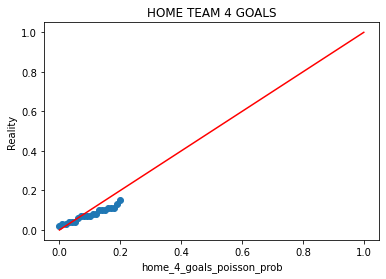

,home_4_goals_poisson_prob,size,home_four_goals_mean
0,0.00,14931,0.02
1,0.01,18371,0.03
2,0.02,13638,0.03
3,0.03,11248,0.04
4,0.04,8968,0.04
5,0.05,7577,0.04
6,0.06,6462,0.06
7,0.07,5584,0.07
8,0.08,4823,0.07
9,0.09,4209,0.07


In [35]:
groupbycol = 'home_4_goals_poisson_prob'
a = df.groupby([groupbycol]).agg({'home_four_goals' : [np.size,np.mean],  
                                            }).reset_index()
a.columns = a.columns.droplevel()
a.columns = [groupbycol] + [ 'size','home_four_goals_mean',  ]

b = a[a['size'] > 50]
b['home_four_goals_mean'] = round(b['home_four_goals_mean'],2)


plt.scatter(x = b[groupbycol], y = b['home_four_goals_mean'])

plt.title('HOME TEAM 4 GOALS')
plt.xlabel(groupbycol)
plt.ylabel('Reality')

plt.plot([0,1],[0,1], 'r')
plt.show()
plt.show()

b

# Distribution of Home 4 goals probabilities

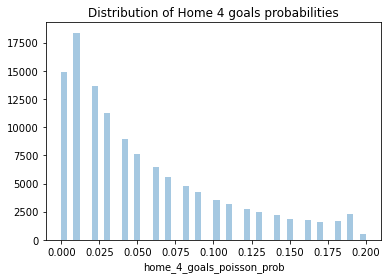

In [36]:
sns.distplot(df[groupbycol],kde=False,bins=50)
plt.title('Distribution of Home 4 goals probabilities')
plt.show()

# AWAY TEAM EXACTLY 0 GOALS

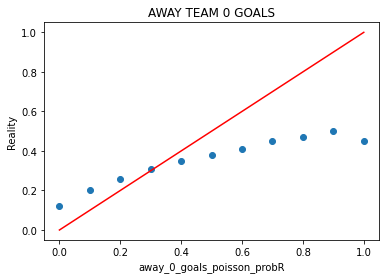

,away_0_goals_poisson_probR,size,away_zero_goals_mean
0,0.0,3053,0.12
1,0.1,12201,0.20
2,0.2,22854,0.26
3,0.3,21013,0.31
4,0.4,23206,0.35
5,0.5,14793,0.38
6,0.6,12027,0.41
7,0.7,5689,0.45
8,0.8,3438,0.47
9,0.9,957,0.50


In [37]:

groupbycol = 'away_0_goals_poisson_probR'
a = df.groupby([groupbycol]).agg({'away_zero_goals' : [np.size,np.mean],  
                                            }).reset_index()
a.columns = a.columns.droplevel()
a.columns = [groupbycol] + [ 'size','away_zero_goals_mean',  ]

b = a[a['size'] > 50]
b['away_zero_goals_mean'] = round(b['away_zero_goals_mean'],2)


plt.scatter(x = b[groupbycol], y = b['away_zero_goals_mean'])

plt.title('AWAY TEAM 0 GOALS')
plt.xlabel(groupbycol)
plt.ylabel('Reality')

plt.plot([0,1],[0,1], 'r')
plt.show()
plt.show()

b

# Rounded at 2nd decimal

<ipython-input-38-53dc4d2aa24b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b['away_zero_goals_mean'] = round(b['away_zero_goals_mean'],2)


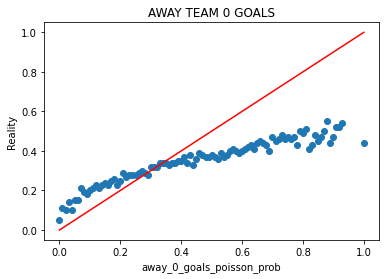

In [38]:
groupbycol = 'away_0_goals_poisson_prob'
a = df.groupby([groupbycol]).agg({'away_zero_goals' : [np.size,np.mean],  
                                            }).reset_index()
a.columns = a.columns.droplevel()
a.columns = [groupbycol] + [ 'size','away_zero_goals_mean',  ]

b = a[a['size'] > 50]
b['away_zero_goals_mean'] = round(b['away_zero_goals_mean'],2)


plt.scatter(x = b[groupbycol], y = b['away_zero_goals_mean'])

plt.title('AWAY TEAM 0 GOALS')
plt.xlabel(groupbycol)
plt.ylabel('Reality')

plt.plot([0,1],[0,1], 'r')
plt.show()
plt.show()


# Distribution of Away 0 goals probabilities

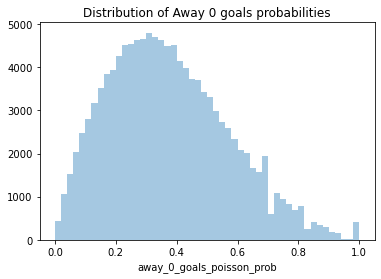

In [39]:
sns.distplot(df[groupbycol],kde=False,bins=50)
plt.title('Distribution of Away 0 goals probabilities')
plt.show()

# AWAY TEAM EXACTLY 1 GOAL

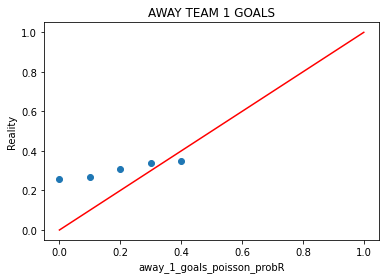

,away_1_goals_poisson_probR,size,away_one_goals_mean
0,0.0,829,0.26
1,0.1,3312,0.27
2,0.2,14913,0.31
3,0.3,45625,0.34
4,0.4,55018,0.35


In [40]:

groupbycol = 'away_1_goals_poisson_probR'
a = df.groupby([groupbycol]).agg({'away_one_goals' : [np.size,np.mean],  
                                            }).reset_index()
a.columns = a.columns.droplevel()
a.columns = [groupbycol] + [ 'size','away_one_goals_mean',  ]

b = a[a['size'] > 50]
b['away_one_goals_mean'] = round(b['away_one_goals_mean'],2)


plt.scatter(x = b[groupbycol], y = b['away_one_goals_mean'])

plt.title('AWAY TEAM 1 GOALS')
plt.xlabel(groupbycol)
plt.ylabel('Reality')

plt.plot([0,1],[0,1], 'r')
plt.show()
plt.show()

b

# Comment

In [41]:
%%capture
groupbycol = 'away_1_goals_poisson_prob'
a = df.groupby([groupbycol]).agg({'away_one_goals' : [np.size,np.mean],  
                                            }).reset_index()
a.columns = a.columns.droplevel()
a.columns = [groupbycol] + [ 'size','away_one_goals_mean',  ]

b = a[a['size'] > 50]
b['away_one_goals_mean'] = round(b['away_one_goals_mean'],2)


plt.scatter(x = b[groupbycol], y = b['away_one_goals_mean'])

plt.title('AWAY TEAM 1 GOALS')
plt.xlabel(groupbycol)
plt.ylabel('Reality')

plt.plot([0,1],[0,1], 'r')
plt.show()
plt.show()

b = b[b['away_1_goals_poisson_prob'] > 0]





b

# Distribution of Away 1 goal probabilities

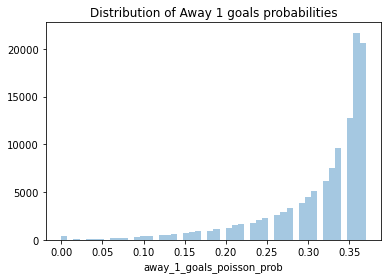

In [42]:
sns.distplot(df[groupbycol],kde=False,bins=50)
plt.title('Distribution of Away 1 goals probabilities')
plt.show()

# AWAY TEAM EXACTLY 2 GOALS

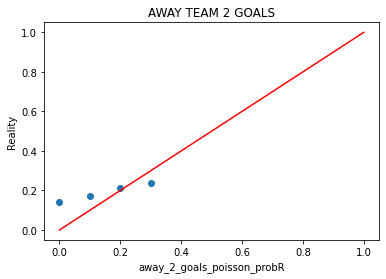

,away_2_goals_poisson_probR,size,away_two_goals_mean
0,0.0,9730,0.14
1,0.1,29688,0.17
2,0.2,57486,0.21
3,0.3,22793,0.24


In [43]:


groupbycol = 'away_2_goals_poisson_probR'
a = df.groupby([groupbycol]).agg({'away_two_goals' : [np.size,np.mean],  
                                            }).reset_index()
a.columns = a.columns.droplevel()
a.columns = [groupbycol] + [ 'size','away_two_goals_mean',  ]

b = a[a['size'] > 50]
b['away_two_goals_mean'] = round(b['away_two_goals_mean'],2)


plt.scatter(x = b[groupbycol], y = b['away_two_goals_mean'])

plt.title('AWAY TEAM 2 GOALS')
plt.xlabel(groupbycol)
plt.ylabel('Reality')

plt.plot([0,1],[0,1], 'r')
plt.show()
plt.show()

b

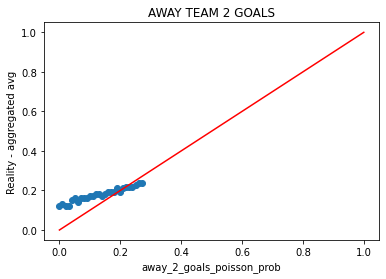

,away_2_goals_poisson_prob,size,away_two_goals_mean
0,0.00,763,0.12
1,0.01,1303,0.13
2,0.02,1486,0.12
3,0.03,1845,0.12
4,0.04,2064,0.15
5,0.05,2269,0.16
6,0.06,2491,0.14
7,0.07,2806,0.16
8,0.08,2876,0.16
9,0.09,3169,0.16


In [44]:
groupbycol = 'away_2_goals_poisson_prob'
a = df.groupby([groupbycol]).agg({'away_two_goals' : [np.size,np.mean],  
                                            }).reset_index()
a.columns = a.columns.droplevel()
a.columns = [groupbycol] + [ 'size','away_two_goals_mean',  ]

b = a[a['size'] > 50]
b['away_two_goals_mean'] = round(b['away_two_goals_mean'],2)


plt.scatter(x = b[groupbycol], y = b['away_two_goals_mean'])

plt.title('AWAY TEAM 2 GOALS')
plt.xlabel(groupbycol)
plt.ylabel('Reality - aggregated avg')

plt.plot([0,1],[0,1], 'r')
plt.show()
plt.show()

b

# Distribution of Away 2 goal probabilities

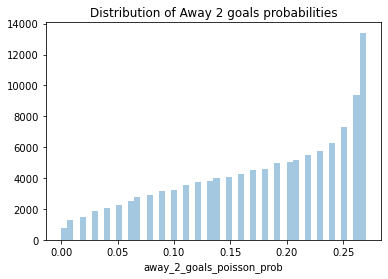

In [45]:
sns.distplot(df[groupbycol],kde=False,bins=50)
plt.title('Distribution of Away 2 goals probabilities')
plt.show()

# AWAY TEAM EXACTLY 3 GOALS

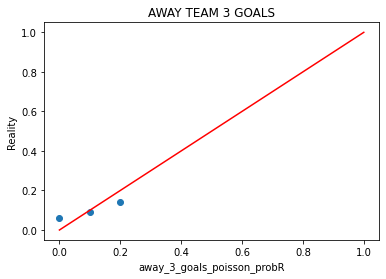

,away_3_goals_poisson_probR,size,away_three_goals_mean
0,0.0,50831,0.06
1,0.1,45241,0.09
2,0.2,23625,0.14


In [46]:

groupbycol = 'away_3_goals_poisson_probR'
a = df.groupby([groupbycol]).agg({'away_three_goals' : [np.size,np.mean],  
                                            }).reset_index()
a.columns = a.columns.droplevel()
a.columns = [groupbycol] + [ 'size','away_three_goals_mean',  ]

b = a[a['size'] > 50]
b['away_three_goals_mean'] = round(b['away_three_goals_mean'],2)


plt.scatter(x = b[groupbycol], y = b['away_three_goals_mean'])

plt.title('AWAY TEAM 3 GOALS')
plt.xlabel(groupbycol)
plt.ylabel('Reality')

plt.plot([0,1],[0,1], 'r')
plt.show()
plt.show()

b

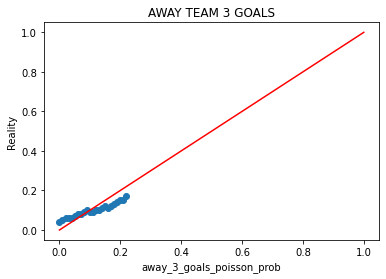

,away_3_goals_poisson_prob,size,away_three_goals_mean
0,0.00,7015,0.04
1,0.01,10434,0.05
2,0.02,9432,0.06
3,0.03,8779,0.06
4,0.04,7882,0.06
5,0.05,7289,0.07
6,0.06,6922,0.08
7,0.07,6295,0.08
8,0.08,5801,0.09
9,0.09,5411,0.10


In [47]:
groupbycol = 'away_3_goals_poisson_prob'
a = df.groupby([groupbycol]).agg({'away_three_goals' : [np.size,np.mean],  
                                            }).reset_index()
a.columns = a.columns.droplevel()
a.columns = [groupbycol] + [ 'size','away_three_goals_mean',  ]

b = a[a['size'] > 50]
b['away_three_goals_mean'] = round(b['away_three_goals_mean'],2)


plt.scatter(x = b[groupbycol], y = b['away_three_goals_mean'])

plt.title('AWAY TEAM 3 GOALS')
plt.xlabel(groupbycol)
plt.ylabel('Reality')

plt.plot([0,1],[0,1], 'r')
plt.show()
plt.show()

b

# Distribution of Away 3 goal probabilities

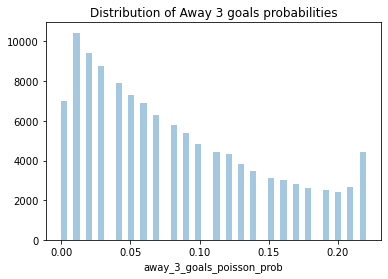

In [48]:
sns.distplot(df[groupbycol],kde=False,bins=50)
plt.title('Distribution of Away 3 goals probabilities')
plt.show()

# AWAY TEAM EXACTLY 4  GOALS

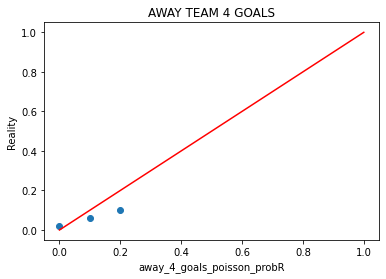

,away_4_goals_poisson_probR,size,away_four_goals_mean
0,0.0,93399,0.02
1,0.1,21718,0.06
2,0.2,4580,0.10


In [49]:
groupbycol = 'away_4_goals_poisson_probR'
a = df.groupby([groupbycol]).agg({'away_four_goals' : [np.size,np.mean],  
                                            }).reset_index()
a.columns = a.columns.droplevel()
a.columns = [groupbycol] + [ 'size','away_four_goals_mean',  ]

b = a[a['size'] > 50]
b['away_four_goals_mean'] = round(b['away_four_goals_mean'],2)


plt.scatter(x = b[groupbycol], y = b['away_four_goals_mean'])

plt.title('AWAY TEAM 4 GOALS')
plt.xlabel(groupbycol)
plt.ylabel('Reality')

plt.plot([0,1],[0,1], 'r')
plt.show()
plt.show()

b

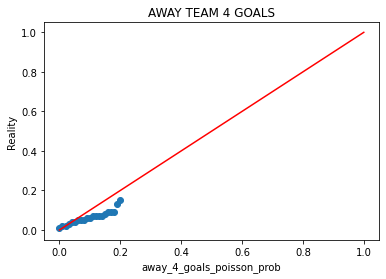

,away_4_goals_poisson_prob,size,away_four_goals_mean
0,0.00,30126,0.01
1,0.01,24608,0.02
2,0.02,14867,0.02
3,0.03,10238,0.03
4,0.04,7633,0.04
5,0.05,5927,0.04
6,0.06,4482,0.05
7,0.07,3794,0.05
8,0.08,3060,0.05
9,0.09,2525,0.06


In [50]:
groupbycol = 'away_4_goals_poisson_prob'
a = df.groupby([groupbycol]).agg({'away_four_goals' : [np.size,np.mean],  
                                            }).reset_index()
a.columns = a.columns.droplevel()
a.columns = [groupbycol] + [ 'size','away_four_goals_mean',  ]

b = a[a['size'] > 50]
b['away_four_goals_mean'] = round(b['away_four_goals_mean'],2)


plt.scatter(x = b[groupbycol], y = b['away_four_goals_mean'])

plt.title('AWAY TEAM 4 GOALS')
plt.xlabel(groupbycol)
plt.ylabel('Reality')

plt.plot([0,1],[0,1], 'r')
plt.show()
plt.show()

b

# Distribution of Away 4 goal probabilities

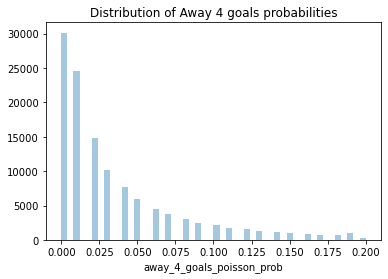

In [51]:
sns.distplot(df[groupbycol],kde=False,bins=50)
plt.title('Distribution of Away 4 goals probabilities')
plt.show()

# An English Premier League Match day Deep Dive

In [52]:
# Keeping the necessary columns
columns = ['date', 'time', 'Country', 'league', 'home', 'away',
       'homegoals', 'awaygoals','L_GH_avg', 'L_GA_avg','sphgfavg', 'sphgagavg', 'spawgfavg',
           'spawgagavg','poissonhomeavg', 
           'poissonawayavg','home_0_goals_poisson_prob', 'home_1_goals_poisson_prob',
           'home_2_goals_poisson_prob','home_3_goals_poisson_prob','home_4_goals_poisson_prob',
           'away_0_goals_poisson_prob','away_1_goals_poisson_prob','away_2_goals_poisson_prob',
          'away_3_goals_poisson_prob', 'away_4_goals_poisson_prob']
        

# Creating a new dataset called sample, containing England Premier League games of 21st of January 2020
sample = df[df['date'] == '21.01.2020']
sample = sample[sample['league'] == 'Premier League 2019/2020']
sample = sample[sample['Country'] == 'England']
sample[columns]

,date,time,Country,league,home,away,homegoals,awaygoals,L_GH_avg,L_GA_avg,sphgfavg,sphgagavg,spawgfavg,spawgagavg,poissonhomeavg,poissonawayavg,home_0_goals_poisson_prob,home_1_goals_poisson_prob,home_2_goals_poisson_prob,home_3_goals_poisson_prob,home_4_goals_poisson_prob,away_0_goals_poisson_prob,away_1_goals_poisson_prob,away_2_goals_poisson_prob,away_3_goals_poisson_prob,away_4_goals_poisson_prob
44,21.01.2020,20:30,England,Premier League 2019/2020,Aston Villa Football Club,Watford Football Club,2.0,1.0,1.48,1.28,1.27,1.82,0.82,1.82,1.561757,1.165937,0.21,0.33,0.26,0.13,0.05,0.31,0.36,0.21,0.08,0.02
45,21.01.2020,20:30,England,Premier League 2019/2020,Athletic Football Club Bournemouth,Brighton & Hove Albion Football Club,3.0,1.0,1.48,1.28,0.91,1.55,0.91,1.64,1.008378,1.101953,0.36,0.37,0.19,0.06,0.02,0.33,0.37,0.20,0.07,0.02
46,21.01.2020,20:30,England,Premier League 2019/2020,Crystal Palace Football Club,Southampton Football Club,0.0,2.0,1.48,1.28,0.91,0.91,1.45,1.27,0.780878,1.030859,0.46,0.36,0.14,0.04,0.01,0.36,0.37,0.19,0.07,0.02
47,21.01.2020,20:30,England,Premier League 2019/2020,Everton Football Club,Newcastle United Football Club,2.0,2.0,1.48,1.28,1.18,1.00,0.91,2.00,1.594595,0.710938,0.20,0.32,0.26,0.14,0.05,0.49,0.35,0.12,0.03,0.01
48,21.01.2020,20:30,England,Premier League 2019/2020,Sheffield United FC,Manchester City Football Club,0.0,1.0,1.48,1.28,1.18,0.91,3.00,1.36,1.084324,2.132812,0.34,0.37,0.20,0.07,0.02,0.12,0.25,0.27,0.19,0.10
78,21.01.2020,21:15,England,Premier League 2019/2020,Chelsea Football Club,Arsenal Football Club,2.0,2.0,1.48,1.28,1.27,0.91,1.09,1.27,1.089797,0.774922,0.34,0.37,0.20,0.07,0.02,0.46,0.36,0.14,0.04,0.01


# BUT, THE REALITY IS THAT THE POISSON DISTRIBUTION, DOES NOT BEHAVE PERFECTLY

# Linear Regression Home Team 0 goals

In [53]:
%%capture
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures


groupbycol = 'home_0_goals_poisson_prob'
a = df.groupby([groupbycol]).agg({'home_zero_goal' : [np.size,np.mean],  
                                            }).reset_index()
a.columns = a.columns.droplevel()
a.columns = [groupbycol] + [ 'size','home_zero_goal_mean',  ]

b = a[a['size'] > 50]
b['home_zero_goal_mean'] = round(b['home_zero_goal_mean'],2)


X = b['home_0_goals_poisson_prob'].values.reshape(-1,1)
y = b['home_zero_goal_mean']
linreg = LinearRegression().fit(X,y)

print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X, y)))


# Plotting your line with your initial dots

line = linreg.intercept_ + linreg.coef_* X
plt.plot(X,line, color = 'r')
plt.plot([0,1],[0,1], 'g')
plt.scatter(X, y)

plt.title(groupbycol + ' linear regression')
plt.xlabel(groupbycol)
plt.ylabel('Reality - aggregated avg')
plt.show()

# Polynomial Regression Home 0 goals

In [54]:
%%capture
groupbycol = 'home_0_goals_poisson_prob'
a = df.groupby([groupbycol]).agg({'home_zero_goal' : [np.size,np.mean],  
                                            }).reset_index()
a.columns = a.columns.droplevel()
a.columns = [groupbycol] + [ 'size','home_zero_goal_mean',  ]

b = a[a['size'] > 50]
b['home_zero_goal_mean'] = round(b['home_zero_goal_mean'],2)

X = b['home_0_goals_poisson_prob'].values
y = b['home_zero_goal_mean']



from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3) # opou edw dhlwneis thn dynamh toy polywnymoy sou




Xpoly = poly.fit_transform(X.reshape(-1,1))


linreg = LinearRegression().fit(Xpoly, y) 

print('(poly deg 3) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 3) linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
# print('(poly deg 2) R-squared score (training): {:.3f}'
#      .format(linreg.score(X_train, y_train)))
print('(poly deg 3) R-squared score (test): {:.3f}\n'
     .format(linreg.score(Xpoly, y)))





###########  CREATION OF THE ABOVE LINE
# Creation of line, depending on the degree of polynom  selected, for this case , N = 3
line = []
for i in X:
    Xcalc = linreg.coef_[1] * i + linreg.coef_[2]*i**2 + linreg.coef_[3]*i**3 + linreg.intercept_
    line.append(Xcalc)




plt.scatter( X,y )


plt.plot(X, line, 'r-')


plt.plot([0,1],[0,1], 'g')

plt.title(groupbycol + ' polynomial regression')
plt.xlabel(groupbycol)
plt.ylabel('Reality - aggregated avg')
plt.show()

# Linear Regression Home Team 1 goal

linear model coeff (w): [0.60550024]
linear model intercept (b): 0.145
R-squared score (test): 0.949


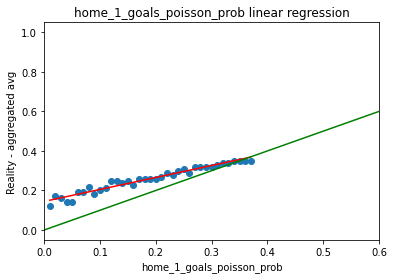

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

groupbycol = 'home_1_goals_poisson_prob'
a = df.groupby([groupbycol]).agg({'home_one_goal' : [np.size,np.mean],  
                                            }).reset_index()
a.columns = a.columns.droplevel()
a.columns = [groupbycol] + [ 'size','home_one_goal_mean',  ]

b = a[a['size'] > 50]
b['home_one_goal_mean'] = round(b['home_one_goal_mean'],2)

# Removing an outlier 
b= b[b['home_1_goals_poisson_prob'] > 0]

X = b['home_1_goals_poisson_prob'].values.reshape(-1,1)
y = b['home_one_goal_mean']
linreg = LinearRegression().fit(X,y)

print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X, y)))


# Plotting your line with your initial dots

line = linreg.intercept_ + linreg.coef_* X
plt.title(groupbycol + ' linear regression')
plt.plot(X,line, color = 'r')
plt.scatter(X, y)

plt.xlabel(groupbycol)
plt.ylabel('Reality - aggregated avg')

plt.plot([0,1],[0,1], 'g')
plt.xlim(0,0.6)
plt.show()

# Linear Regression Home Team 2 goals

linear model coeff (w): [0.34838533]
linear model intercept (b): 0.159
R-squared score (test): 0.885


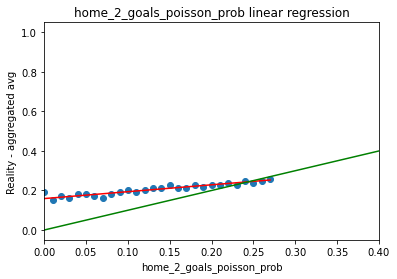

In [56]:
groupbycol = 'home_2_goals_poisson_prob'
a = df.groupby([groupbycol]).agg({'home_two_goals' : [np.size,np.mean],  
                                            }).reset_index()
a.columns = a.columns.droplevel()
a.columns = [groupbycol] + [ 'size','home_two_goals_mean',  ]

b = a[a['size'] > 50]
b['home_two_goals_mean'] = round(b['home_two_goals_mean'],2)

X = b['home_2_goals_poisson_prob'].values.reshape(-1,1)
y = b['home_two_goals_mean']

linreg = LinearRegression().fit(X,y)

print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X, y)))


# Plotting your line with your initial dots

line = linreg.intercept_ + linreg.coef_* X
plt.title(groupbycol + ' linear regression')
plt.plot(X,line, color = 'r')
plt.scatter(X, y)
plt.plot([0,1],[0,1], 'g')
plt.xlim(0,0.4)
plt.xlabel(groupbycol)
plt.ylabel('Reality - aggregated avg')
plt.show()

# Linear Regression Home Team 3 goals

linear model coeff (w): [0.51284585]
linear model intercept (b): 0.061
R-squared score (test): 0.951


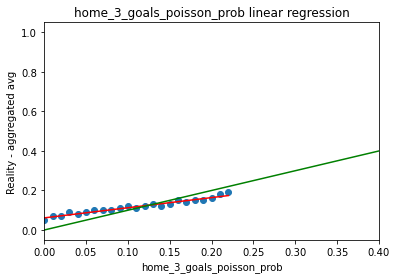

In [57]:
groupbycol = 'home_3_goals_poisson_prob'
a = df.groupby([groupbycol]).agg({'home_three_goals' : [np.size,np.mean],  
                                            }).reset_index()
a.columns = a.columns.droplevel()
a.columns = [groupbycol] + [ 'size','home_three_goals_mean',  ]

b = a[a['size'] > 50]
b['home_three_goals_mean'] = round(b['home_three_goals_mean'],2)

X = b['home_3_goals_poisson_prob'].values.reshape(-1,1)
y = b['home_three_goals_mean']

linreg = LinearRegression().fit(X,y)

print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X, y)))


# Plotting your line with your initial dots

line = linreg.intercept_ + linreg.coef_* X
plt.title(groupbycol + ' linear regression')
plt.plot(X,line, color = 'r')
plt.scatter(X, y)
plt.plot([0,1],[0,1], 'g')
plt.xlim(0,0.4)
plt.xlabel(groupbycol)
plt.ylabel('Reality - aggregated avg')
plt.show()

# Linear Regression Home Team 4 goals

linear model coeff (w): [0.56233766]
linear model intercept (b): 0.020
R-squared score (test): 0.964


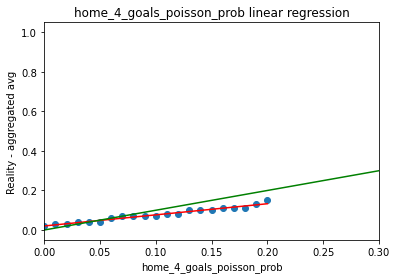

In [58]:
groupbycol = 'home_4_goals_poisson_prob'
a = df.groupby([groupbycol]).agg({'home_four_goals' : [np.size,np.mean],  
                                            }).reset_index()
a.columns = a.columns.droplevel()
a.columns = [groupbycol] + [ 'size','home_four_goals_mean',  ]

b = a[a['size'] > 50]
b['home_four_goals_mean'] = round(b['home_four_goals_mean'],2)

X = b['home_4_goals_poisson_prob'].values.reshape(-1,1)
y = b['home_four_goals_mean']

linreg = LinearRegression().fit(X,y)

print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X, y)))


# Plotting your line with your initial dots

line = linreg.intercept_ + linreg.coef_* X
plt.title(groupbycol + ' linear regression')
plt.plot(X,line, color = 'r')
plt.scatter(X, y)
plt.plot([0,1],[0,1], 'g')
plt.xlim(0,0.3)
plt.xlabel(groupbycol)
plt.ylabel('Reality - aggregated avg')
plt.show()

# AWAY TEAM GOALS CORRECTIONS

# Linear Regression Away Team 0 goals

<ipython-input-70-55ee3a30ff59>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b['away_zero_goals_mean'] = round(b['away_zero_goals_mean'],2)


linear model coeff (w): [0.3838303]
linear model intercept (b): 0.171
R-squared score (test): 0.909


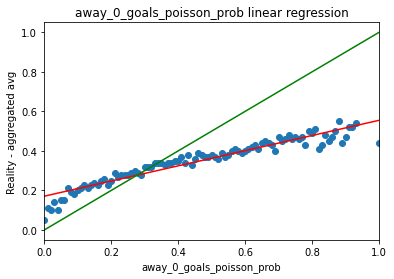

In [70]:

groupbycol = 'away_0_goals_poisson_prob'
a = df.groupby([groupbycol]).agg({'away_zero_goals' : [np.size,np.mean],  
                                            }).reset_index()
a.columns = a.columns.droplevel()
a.columns = [groupbycol] + [ 'size','away_zero_goals_mean',  ]

b = a[a['size'] > 50]
b['away_zero_goals_mean'] = round(b['away_zero_goals_mean'],2)

X = b['away_0_goals_poisson_prob'].values.reshape(-1,1)
y = b['away_zero_goals_mean']

linreg = LinearRegression().fit(X,y)

print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X, y)))


# Plotting your line with your initial dots

line = linreg.intercept_ + linreg.coef_* X
plt.title(groupbycol + ' linear regression')
plt.plot(X,line, color = 'r')
plt.scatter(X, y)
plt.plot([0,1],[0,1], 'g')
plt.xlim(0,1)
plt.xlabel(groupbycol)
plt.ylabel('Reality - aggregated avg')
plt.show()

# Polynomial Regression Away Team 0 goals

(poly deg 2) linear model coeff (w):
[ 0.          0.93287045 -0.95273605  0.43495828]
(poly deg 2) linear model intercept (b): 0.104
(poly deg 2) R-squared score (test): 0.956



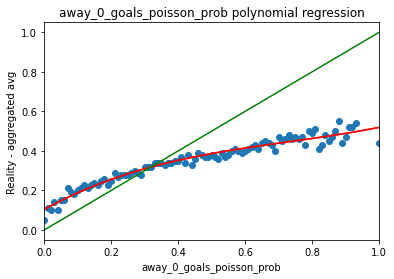

In [60]:

X = b['away_0_goals_poisson_prob'].values
y = b['away_zero_goals_mean']




from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3) # opou edw dhlwneis thn dynamh toy polywnymoy sou





Xpoly = poly.fit_transform(X.reshape(-1,1))


linreg = LinearRegression().fit(Xpoly, y) 

print('(poly deg 2) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 2) linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
# print('(poly deg 2) R-squared score (training): {:.3f}'
#      .format(linreg.score(X_train, y_train)))
print('(poly deg 2) R-squared score (test): {:.3f}\n'
     .format(linreg.score(Xpoly, y)))




###########  CREATION OF THE ABOVE LINE
# Creation of line, depending on the degree of polynom  selected, for this case , N = 3
line = []
for i in X:
    Xcalc = linreg.coef_[1] * i + linreg.coef_[2]*i**2 + linreg.coef_[3]*i**3 + linreg.intercept_
    line.append(Xcalc)







plt.plot(X, line, 'r-')
plt.title(groupbycol + ' polynomial regression')
plt.plot(X,line, color = 'r')
plt.scatter(X, y)
plt.plot([0,1],[0,1], 'g')
plt.xlim(0,1)
plt.xlabel(groupbycol)
plt.ylabel('Reality - aggregated avg')
plt.show()

# Linear Regression Away Team 1 goal

<ipython-input-72-7ca63fca4883>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b['away_one_goals_mean'] = round(b['away_one_goals_mean'],2)


linear model coeff (w): [0.43976834]
linear model intercept (b): 0.213
R-squared score (test): 0.820


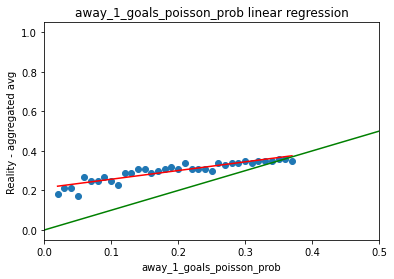

In [72]:

groupbycol = 'away_1_goals_poisson_prob'
a = df.groupby([groupbycol]).agg({'away_one_goals' : [np.size,np.mean],  
                                            }).reset_index()
a.columns = a.columns.droplevel()
a.columns = [groupbycol] + [ 'size','away_one_goals_mean',  ]

b = a[a['size'] > 50]
b['away_one_goals_mean'] = round(b['away_one_goals_mean'],2)




# Removing the outlier at x = 0
b = b[b['away_1_goals_poisson_prob'] > 0]

X = b['away_1_goals_poisson_prob'].values.reshape(-1,1)
y = b['away_one_goals_mean']
linreg = LinearRegression().fit(X,y)

print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X, y)))


# Plotting your line with your initial dots

line = linreg.intercept_ + linreg.coef_* X
plt.title(groupbycol + ' linear regression')
plt.plot(X,line, color = 'r')
plt.scatter(X, y)
plt.plot([0,1],[0,1], 'g')
plt.xlim(0,0.5)
plt.xlabel(groupbycol)
plt.ylabel('Reality - aggregated avg')
plt.show()

# Polynomial Regression Away Team 1 goal

<ipython-input-74-9bf32ed2fd93>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b['away_one_goals_mean'] = round(b['away_one_goals_mean'],2)


(poly deg 3) linear model coeff (w):
[ 0.          1.53932612 -4.96183731  6.25980502]
(poly deg 3) linear model intercept (b): 0.155
(poly deg 3) R-squared score (test): 0.894



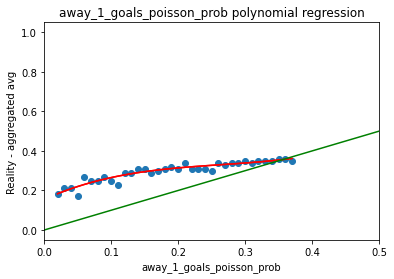

In [74]:

groupbycol = 'away_1_goals_poisson_prob'
a = df.groupby([groupbycol]).agg({'away_one_goals' : [np.size,np.mean],  
                                            }).reset_index()
a.columns = a.columns.droplevel()
a.columns = [groupbycol] + [ 'size','away_one_goals_mean',  ]

b = a[a['size'] > 50]
b['away_one_goals_mean'] = round(b['away_one_goals_mean'],2)




# Removing the outlier at x = 0
b = b[b['away_1_goals_poisson_prob'] > 0]
X = b['away_1_goals_poisson_prob'].values
y = b['away_one_goals_mean']




from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3) # opou edw dhlwneis thn dynamh toy polywnymoy sou





Xpoly = poly.fit_transform(X.reshape(-1,1))


linreg = LinearRegression().fit(Xpoly, y) 

print('(poly deg 3) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 3) linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
# print('(poly deg 2) R-squared score (training): {:.3f}'
#      .format(linreg.score(X_train, y_train)))
print('(poly deg 3) R-squared score (test): {:.3f}\n'
     .format(linreg.score(Xpoly, y)))




###########  CREATION OF THE ABOVE LINE
# Creation of line, depending on the degree of polynom  selected, for this case , N = 3
line = []
for i in X:
    Xcalc = linreg.coef_[1] * i + linreg.coef_[2]*i**2 + linreg.coef_[3]*i**3 + linreg.intercept_
    line.append(Xcalc)





plt.plot(X, line, 'r-')


plt.title(groupbycol + ' polynomial regression')
plt.plot(X,line, color = 'r')
plt.scatter(X, y)
plt.plot([0,1],[0,1], 'g')
plt.xlim(0,0.5)
plt.xlabel(groupbycol)
plt.ylabel('Reality - aggregated avg')
plt.show()

# Linear Regression Away Team 2 goals

linear model coeff (w): [0.42309797]
linear model intercept (b): 0.122
R-squared score (test): 0.951


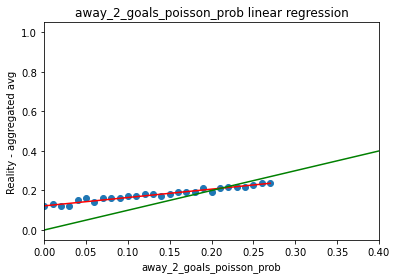

In [75]:
groupbycol = 'away_2_goals_poisson_prob'
a = df.groupby([groupbycol]).agg({'away_two_goals' : [np.size,np.mean],  
                                            }).reset_index()
a.columns = a.columns.droplevel()
a.columns = [groupbycol] + [ 'size','away_two_goals_mean',  ]

b = a[a['size'] > 50]
b['away_two_goals_mean'] = round(b['away_two_goals_mean'],2)

X = b['away_2_goals_poisson_prob'].values.reshape(-1,1)
y = b['away_two_goals_mean']
linreg = LinearRegression().fit(X,y)

print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X, y)))


# Plotting your line with your initial dots

line = linreg.intercept_ + linreg.coef_* X
plt.title(groupbycol + ' linear regression')
plt.plot(X,line, color = 'r')
plt.scatter(X, y)
plt.plot([0,1],[0,1], 'g')
plt.xlim(0,0.4)
plt.xlabel(groupbycol)
plt.ylabel('Reality - aggregated avg')
plt.show()

# Linear Regression Away Team 3 goals

linear model coeff (w): [0.49901186]
linear model intercept (b): 0.044
R-squared score (test): 0.960


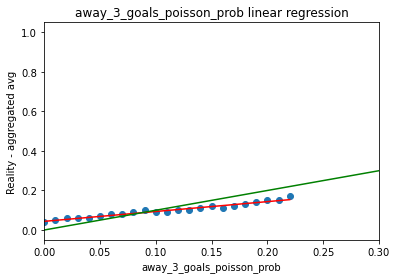

In [76]:
groupbycol = 'away_3_goals_poisson_prob'
a = df.groupby([groupbycol]).agg({'away_three_goals' : [np.size,np.mean],  
                                            }).reset_index()
a.columns = a.columns.droplevel()
a.columns = [groupbycol] + [ 'size','away_three_goals_mean',  ]

b = a[a['size'] > 50]
b['away_three_goals_mean'] = round(b['away_three_goals_mean'],2)

X = b['away_3_goals_poisson_prob'].values.reshape(-1,1)
y = b['away_three_goals_mean']
linreg = LinearRegression().fit(X,y)

print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X, y)))


# Plotting your line with your initial dots

line = linreg.intercept_ + linreg.coef_* X
plt.title(groupbycol + ' linear regression')
plt.plot(X,line, color = 'r')
plt.scatter(X, y)
plt.plot([0,1],[0,1], 'g')
plt.xlim(0,0.3)
plt.xlabel(groupbycol)
plt.ylabel('Reality - aggregated avg')
plt.show()

# Linear Regression Away Team 4 goals

linear model coeff (w): [0.52727273]
linear model intercept (b): 0.011
R-squared score (test): 0.896


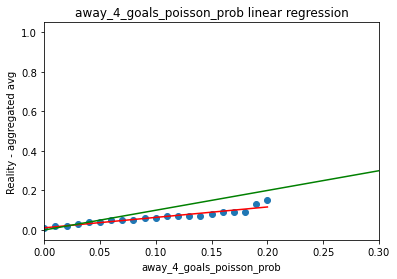

In [77]:
groupbycol = 'away_4_goals_poisson_prob'
a = df.groupby([groupbycol]).agg({'away_four_goals' : [np.size,np.mean],  
                                            }).reset_index()
a.columns = a.columns.droplevel()
a.columns = [groupbycol] + [ 'size','away_four_goals_mean',  ]

b = a[a['size'] > 50]
b['away_four_goals_mean'] = round(b['away_four_goals_mean'],2)

X = b['away_4_goals_poisson_prob'].values.reshape(-1,1)
y = b['away_four_goals_mean']
linreg = LinearRegression().fit(X,y)

print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X, y)))


# Plotting your line with your initial dots

line = linreg.intercept_ + linreg.coef_* X
plt.title(groupbycol + ' linear regression')
plt.plot(X,line, color = 'r')
plt.scatter(X, y)
plt.plot([0,1],[0,1], 'g')
plt.xlim(0,0.3)
plt.xlabel(groupbycol)
plt.ylabel('Reality - aggregated avg')
plt.show()

# COMMENTS ON THE CORRECTIONS

# EFFORT TO PREDICT THE DRAWS

In [78]:
%%capture
df['0-0'] = df['home_0_goals_poisson_prob']  *  df['away_0_goals_poisson_prob']

df['1-1'] = df['home_1_goals_poisson_prob']  *  df['away_1_goals_poisson_prob']

df['2-2'] = df['home_2_goals_poisson_prob']  *  df['away_2_goals_poisson_prob']

df['3-3'] = df['home_3_goals_poisson_prob']  *  df['away_3_goals_poisson_prob']

df['4-4'] = df['home_4_goals_poisson_prob']  *  df['away_4_goals_poisson_prob']

# Creation of draw probability
df['draw_prob'] = df['0-0'] + df['1-1'] + df['2-2'] + df['3-3'] + df['4-4']

# Rounding in two decimals
df['draw_prob'] = round(df['draw_prob'], 2)

In [80]:
%%capture
# Creation of draw column

df['draw'] =  np.where((df['homegoals'] == df['awaygoals']),1,0)

# Aggregation

<ipython-input-82-08341b5ae8c9>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b['draw_mean'] = round(b['draw_mean'],2)


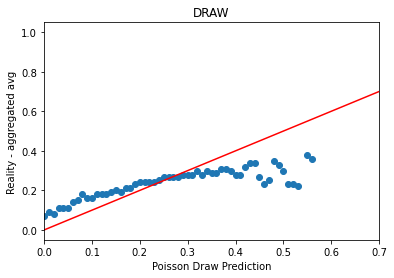

In [82]:

groupbycol = 'draw_prob'
a = df.groupby([groupbycol]).agg({'draw' : [np.size,np.mean],  
                                            }).reset_index()
a.columns = a.columns.droplevel()
a.columns = [groupbycol] + [ 'size','draw_mean',  ]

b = a[a['size'] > 50]
b['draw_mean'] = round(b['draw_mean'],2)

plt.scatter(x = b[groupbycol], y = b['draw_mean'])

plt.title('DRAW')
plt.xlabel('Poisson Draw Prediction')
plt.ylabel('Reality - aggregated avg')
plt.xlim(0, 0.7)
plt.plot([0,1],[0,1], 'r')
plt.show()
plt.show()


# Distribution of draw probability

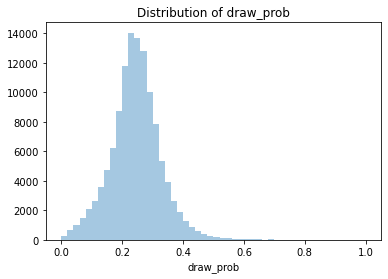

In [83]:
sns.distplot(df['draw_prob'],kde=False)
plt.title('Distribution of draw_prob')
plt.show()

# The full matrix of the probabilities with the N(size) of observations and the aggregated avg

In [84]:
b

,draw_prob,size,draw_mean
0,0.00,110,0.07
1,0.01,152,0.09
2,0.02,302,0.08
3,0.03,378,0.11
4,0.04,455,0.11
5,0.05,576,0.11
6,0.06,695,0.14
7,0.07,821,0.15
8,0.08,916,0.18
9,0.09,1158,0.16


# CORRECTED DRAW PROBABILITIES SECTOR

In [85]:
%%capture
df['home0goalscorrected'] = 0.083 + 0.66293381 * df['home_0_goals_poisson_prob'] -0.29706873 * df['home_0_goals_poisson_prob']**2 -0.07378268* df['home_0_goals_poisson_prob']**3 

In [86]:
%%capture
df['home1goalscorrected'] = 0.159 + 0.56448554 * df['home_1_goals_poisson_prob']
df['home2goalscorrected'] = 0.163 + 0.33004926 * df['home_2_goals_poisson_prob']
df['home3goalscorrected'] = 0.065 + 0.49110672 * df['home_3_goals_poisson_prob']
df['home4goalscorrected'] = 0.022 + 0.54025974 * df['home_4_goals_poisson_prob']

In [87]:
%%capture
df['away0goalscorrected'] = 0.115 + 0.83848732 * df['away_0_goals_poisson_prob'] -0.73197347 * df['away_0_goals_poisson_prob']**2  + 0.25794387 * df['away_0_goals_poisson_prob']**3 
df['away1goalscorrected'] = 0.158 + 1.66689253 * df['away_1_goals_poisson_prob'] -5.84229036 * df['away_1_goals_poisson_prob']**2  + 7.63748442 * df['away_1_goals_poisson_prob']**3 

In [88]:
%%capture
df['away2goalscorrected'] = 0.128 + 0.39135194 * df['away_2_goals_poisson_prob']
df['away3goalscorrected'] = 0.046 + 0.47332016 * df['away_3_goals_poisson_prob']
df['away4goalscorrected'] = 0.012 + 0.5038961  * df['away_4_goals_poisson_prob']

In [89]:
%%capture
df['0-0new'] = df['home0goalscorrected']  *  df['away0goalscorrected']

df['1-1new'] = df['home1goalscorrected']  *  df['away1goalscorrected']

df['2-2new'] = df['home2goalscorrected']  *  df['away2goalscorrected']

df['3-3new'] = df['home3goalscorrected']  *  df['away3goalscorrected']

df['4-4new'] = df['home4goalscorrected']  *  df['away4goalscorrected']

df['draw_prob_new'] = df['0-0new'] + df['1-1new'] + df['2-2new'] + df['3-3new'] + df['4-4new']
df['draw_prob_new'] = round(df['draw_prob_new'], 2)

# Aggregating by the newly corrected draw probability

<ipython-input-97-828de5bd0e85>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b['draw_mean'] = round(b['draw_mean'],2)


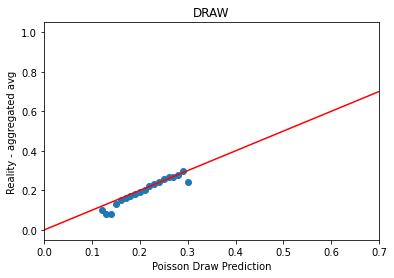

In [97]:

groupbycol = 'draw_prob_new'
a = df.groupby([groupbycol]).agg({'draw' : [np.size,np.mean],  
                                            }).reset_index()
a.columns = a.columns.droplevel()
a.columns = [groupbycol] + [ 'size','draw_mean',  ]

b = a[a['size'] > 50]
b['draw_mean'] = round(b['draw_mean'],2)

plt.scatter(x = b[groupbycol], y = b['draw_mean'])

plt.title('DRAW')
plt.xlabel('Poisson Draw Prediction')
plt.ylabel('Reality - aggregated avg')
plt.xlim(0, 0.7)
plt.plot([0,1],[0,1], 'r')
plt.show()
plt.show()


# The full matrix of the corrected probabilities with the N(size) of observations and the aggregated avg

In [91]:
b

,draw_prob_new,size,draw_mean
3,0.12,119,0.10
4,0.13,268,0.08
5,0.14,498,0.08
6,0.15,835,0.13
7,0.16,1222,0.15
8,0.17,1730,0.16
9,0.18,2435,0.17
10,0.19,3376,0.18
11,0.20,4508,0.19
12,0.21,6047,0.20


# THE LAST TWO GRAPHS ON THE SAME CANVAS

<ipython-input-98-e324c53ae127>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b['draw_mean'] = round(b['draw_mean'],2)
<ipython-input-98-e324c53ae127>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b['draw_mean'] = round(b['draw_mean'],2)


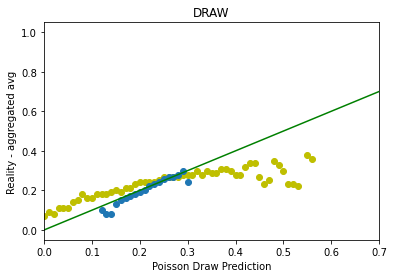

In [98]:

groupbycol = 'draw_prob'
a = df.groupby([groupbycol]).agg({'draw' : [np.size,np.mean],  
                                            }).reset_index()
a.columns = a.columns.droplevel()
a.columns = [groupbycol] + [ 'size','draw_mean',  ]

b = a[a['size'] > 50]
b['draw_mean'] = round(b['draw_mean'],2)

c = b

plt.scatter(x = c[groupbycol], y = c['draw_mean'], color = 'y')

groupbycol = 'draw_prob_new'
a = df.groupby([groupbycol]).agg({'draw' : [np.size,np.mean],  
                                            }).reset_index()
a.columns = a.columns.droplevel()
a.columns = [groupbycol] + [ 'size','draw_mean',  ]

b = a[a['size'] > 50]
b['draw_mean'] = round(b['draw_mean'],2)

plt.scatter(x = b[groupbycol], y = b['draw_mean'])

plt.title('DRAW')
plt.xlabel('Poisson Draw Prediction')
plt.ylabel('Reality - aggregated avg')
plt.xlim(0, 0.7)
plt.plot([0,1],[0,1], 'g')
plt.show()








# Hypothesis 

In [93]:
# Subset of high draws
sub = df[df['draw_prob_new'] == 0.29]

# Average max odds on this subset

In [94]:
sub['ODDX_max'].mean()

3.3172699573430897

# Distribution of ODDX_max

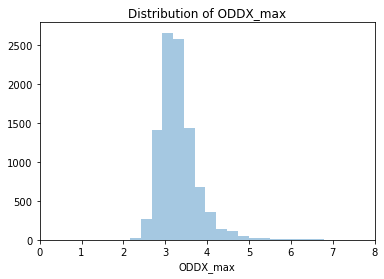

In [95]:
sns.distplot(sub['ODDX_max'],kde=False)
plt.title('Distribution of ODDX_max')
plt.xlim(0,8)
plt.show()

# Comment

In [96]:
sub2 = sub[sub['ODDX_max'] >= 3.44]
print('Number of games with value :', len(sub2))
print('Number of games that actually ended as a draw:',sub2['draw'].sum())
print('Percentage of succesfull draws having value:',sub2['draw'].sum() / len(sub2))
print('Net Return : ', sub2[sub2['draw'] == 1]['ODDX_max'].sum())

Number of games with value : 2952
Number of games that actually ended as a draw: 735
Percentage of succesfull draws having value: 0.24898373983739838
Net Return :  2783.4


# Comment

# Conclusion